<a href="https://colab.research.google.com/github/rianaditro/classification_web_app/blob/main/classification_C5_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requirement

In [2]:
import pandas as pd
import numpy as np

In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
pip install c45-decision-tree

In [5]:
from C45 import C45Classifier

In [75]:
import seaborn as sns
from matplotlib import pyplot as plt
# generate tree diagram with C45Classifier modul
import graphviz

## Data Pre-processing

In [6]:
df = pd.read_excel('databulu.xlsx')
df.head()

,spesies,texture,structure,color,scale position,scale distance,scale margin,scale pattern,Unnamed: 8,medulla composition,...,medulla margin,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
0,S. barbatus,rough,"straight, curve","black at the base to the middle, broken white ...",transversal,close,rippled,iiregular wave,NaN,amorphous,...,amorphous,circular,circular,circular,flower shape,flower shape,flower shape,35144,28000,0.796722
1,S. barbatus,rough,"straight, curve","black at the base to the middle, broken white ...",transversal,close,rippled,iiregular wave,NaN,amorphous,...,amorphous,circular,circular,circular,flower shape,flower shape,flower shape,36285,29714,0.818906
2,S. barbatus,rough,"straight, curve","black at the base to the middle, broken white ...",transversal,close,rippled,iiregular wave,NaN,amorphous,...,amorphous,circular,circular,circular,flower shape,flower shape,flower shape,40285,33428,0.829788
3,S. barbatus,rough,"straight, curve","black at the base to the middle, broken white ...",transversal,close,rippled,iiregular wave,NaN,amorphous,...,amorphous,circular,circular,circular,flower shape,flower shape,flower shape,31714,26286,0.828845
4,S. barbatus,rough,"straight, curve","black at the base to the middle, broken white ...",transversal,close,rippled,iiregular wave,NaN,amorphous,...,amorphous,circular,circular,circular,flower shape,flower shape,flower shape,39144,31714,0.810188


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   spesies                              1350 non-null   object 
 1   texture                              1350 non-null   object 
 2   structure                            1350 non-null   object 
 3   color                                1350 non-null   object 
 4   scale position                       1350 non-null   object 
 5   scale distance                       1350 non-null   object 
 6   scale margin                         1350 non-null   object 
 7   scale pattern                        1350 non-null   object 
 8   Unnamed: 8                           0 non-null      float64
 9   medulla composition                  1350 non-null   object 
 10  medulla structure                    1350 non-null   object 
 11  medulla pattern               

In [8]:
# removing empty column
df.dropna(how='all', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   spesies                              1350 non-null   object 
 1   texture                              1350 non-null   object 
 2   structure                            1350 non-null   object 
 3   color                                1350 non-null   object 
 4   scale position                       1350 non-null   object 
 5   scale distance                       1350 non-null   object 
 6   scale margin                         1350 non-null   object 
 7   scale pattern                        1350 non-null   object 
 8   medulla composition                  1350 non-null   object 
 9   medulla structure                    1350 non-null   object 
 10  medulla pattern                      1350 non-null   object 
 11  medulla margin                

In [9]:
df.nunique()

spesies                                   5
texture                                   1
structure                                 1
color                                     8
scale position                            1
scale distance                            1
scale margin                              1
scale pattern                             1
medulla composition                       1
medulla structure                         1
medulla pattern                           1
medulla margin                            1
hair cross section in the base            3
hair cross section in the middle          3
hair cross section in the tip             2
medulla cross section in the base         3
medulla cross section in the middle       3
medulla cross section in the tip          3
d rambut                               1052
d medula                               1054
index medula                           1342
dtype: int64

In [10]:
# removing low variance feature
ls = df.nunique().to_list()
idx = [i for i in range(len(ls)) if ls[i] == 1]

df= df.drop(df.columns[idx],axis=1)
df.nunique()

spesies                                   5
color                                     8
hair cross section in the base            3
hair cross section in the middle          3
hair cross section in the tip             2
medulla cross section in the base         3
medulla cross section in the middle       3
medulla cross section in the tip          3
d rambut                               1052
d medula                               1054
index medula                           1342
dtype: int64

In [11]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(df[col].value_counts())
    print("=====================================================================")

spesies
S. barbatus       270
S. celebensis     270
S. scrofa         270
S. verrucossus    270
S. scofa          270
Name: count, dtype: int64
color
black at the base to the middle, broken white at the tip                270
black, without gradation                                                270
black at the base, broken white at the middle, dark brown at the tip    270
black at the base and dark brown at the tip                             270
black without gradation                                                  68
red at the base and dark brown at the tip                                68
white at the base and light brown at the tip                             67
dark brown at the base and black at the tip                              67
Name: count, dtype: int64
hair cross section in the base
circular      810
triangular    270
oval          270
Name: count, dtype: int64
hair cross section in the middle
circular      540
oval          540
triangular    270
Name: count, dtype

In [12]:
# notice value in the color columns there is a duplicate for 'black without gradation'
df['color'].value_counts()

color
black at the base to the middle, broken white at the tip                270
black, without gradation                                                270
black at the base, broken white at the middle, dark brown at the tip    270
black at the base and dark brown at the tip                             270
black without gradation                                                  68
red at the base and dark brown at the tip                                68
white at the base and light brown at the tip                             67
dark brown at the base and black at the tip                              67
Name: count, dtype: int64

In [13]:
# cleaning data
df['color'] = df['color'].str.replace(",","")
df['color'].value_counts()

color
black without gradation                                               338
black at the base to the middle broken white at the tip               270
black at the base broken white at the middle dark brown at the tip    270
black at the base and dark brown at the tip                           270
red at the base and dark brown at the tip                              68
white at the base and light brown at the tip                           67
dark brown at the base and black at the tip                            67
Name: count, dtype: int64

In [16]:
# standarization
data_to_scale = df[['d rambut', 'd medula', 'index medula']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)
df[['d rambut', 'd medula', 'index medula']] = scaled_data

In [17]:
# final look before re-processing for choosen model
df.head()

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
0,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.553221,-1.276941,0.884385
1,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.543329,-1.255775,1.008958
2,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.508649,-1.209911,1.070064
3,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.582959,-1.298108,1.064772
4,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.518541,-1.231077,0.960003


### Pre-processing for the C5.0

In [80]:
# create a copy of dataframe
tree_df = df.copy()
tree_df.head()

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
0,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.553221,-1.276941,0.884385
1,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.543329,-1.255775,1.008958
2,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.508649,-1.209911,1.070064
3,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.582959,-1.298108,1.064772
4,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.518541,-1.231077,0.960003


In [81]:
tree_df.describe()

,d rambut,d medula,index medula
count,1.350000e+03,1.350000e+03,1.350000e+03
mean,-2.105312e-17,2.105312e-17,2.105312e-16
std,1.000371e+00,1.000371e+00,1.000371e+00
min,-1.615506e+00,-1.566391e+00,-3.483125e+00
25%,-1.377351e+00,-1.139947e+00,-5.480910e-01
50%,2.228681e-01,1.523961e-01,2.406108e-01
75%,6.723243e-01,7.041868e-01,6.908597e-01
max,2.432194e+00,2.953173e+00,1.583421e+00


In [82]:
# get the percentile to categorize data
bins_d_rambut = [-float('inf'), tree_df['d rambut'].quantile(0.25), tree_df['d rambut'].quantile(0.5), tree_df['d rambut'].quantile(0.75), float('inf')]
bins_d_medula = [-float('inf'), tree_df['d medula'].quantile(0.25), tree_df['d medula'].quantile(0.5), tree_df['d medula'].quantile(0.75), float('inf')]
bins_index = [-float('inf'), tree_df['index medula'].quantile(0.25), tree_df['index medula'].quantile(0.5), tree_df['index medula'].quantile(0.75), float('inf')]
labels = ['under 25%', 'under 50%', 'under 75%', '75% above']

In [83]:
# convert numerical to categorical
tree_df['d rambut'] = pd.cut(tree_df['d rambut'], bins=bins_d_rambut, labels=labels, include_lowest=True)
tree_df['d medula'] = pd.cut(tree_df['d medula'], bins=bins_d_medula, labels=labels, include_lowest=True)
tree_df['index medula'] = pd.cut(tree_df['index medula'], bins=bins_index, labels=labels, include_lowest=True)

In [84]:
tree_df.head()

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
0,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,under 25%,under 25%,75% above
1,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,under 25%,under 25%,75% above
2,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,under 25%,under 25%,75% above
3,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,under 25%,under 25%,75% above
4,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,under 25%,under 25%,75% above


### Pre-processing for KNN

In [18]:
num_df = df.copy()
num_df.head()

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
0,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.553221,-1.276941,0.884385
1,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.543329,-1.255775,1.008958
2,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.508649,-1.209911,1.070064
3,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.582959,-1.298108,1.064772
4,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.518541,-1.231077,0.960003


In [86]:
# label encoder
le = LabelEncoder()
for col in num_df.columns:
  if num_df[col].dtypes == 'object':
    num_df[col] = le.fit_transform(num_df[col])
num_df.head()

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
0,0,2,0,0,0,1,0,1,-1.553221,-1.276941,0.884385
1,0,2,0,0,0,1,0,1,-1.543329,-1.255775,1.008958
2,0,2,0,0,0,1,0,1,-1.508649,-1.209911,1.070064
3,0,2,0,0,0,1,0,1,-1.582959,-1.298108,1.064772
4,0,2,0,0,0,1,0,1,-1.518541,-1.231077,0.960003


## this is trial to check correlation with one hot encoding

In [28]:
corr_df = df.copy()
corr_df.head(1)

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
0,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.553221,-1.276941,0.884385


In [29]:
# converting target data with label encoding
le = LabelEncoder()
le.fit(corr_df['spesies'])
print(list(zip(le.classes_, le.transform(le.classes_))))


[('S. barbatus', 0), ('S. celebensis', 1), ('S. scofa', 2), ('S. scrofa', 3), ('S. verrucossus', 4)]


In [ ]:
corr_df['spesies'] = le.transform(corr_df['spesies'])

In [ ]:
corr_df['spesies']

In [62]:
# transform column with 2 variance
le.fit(corr_df['hair cross section in the tip'])
print(list(zip(le.classes_, le.transform(le.classes_))))
corr_df['hair cross section in the tip'] = le.transform(corr_df['hair cross section in the tip'])

[('circular', 0), ('triangular', 1)]


In [63]:
corr_df.head()

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
0,0,black at the base to the middle broken white a...,circular,circular,0,flower shape,flower shape,flower shape,-1.553221,-1.276941,0.884385
1,0,black at the base to the middle broken white a...,circular,circular,0,flower shape,flower shape,flower shape,-1.543329,-1.255775,1.008958
2,0,black at the base to the middle broken white a...,circular,circular,0,flower shape,flower shape,flower shape,-1.508649,-1.209911,1.070064
3,0,black at the base to the middle broken white a...,circular,circular,0,flower shape,flower shape,flower shape,-1.582959,-1.298108,1.064772
4,0,black at the base to the middle broken white a...,circular,circular,0,flower shape,flower shape,flower shape,-1.518541,-1.231077,0.960003


In [64]:
# list of feature columns to encoded
col_to_encod = list(corr_df.select_dtypes(include=['object']).columns)
print(col_to_encod)

['color', 'hair cross section in the base', 'hair cross section in the middle', 'medulla cross section in the base', 'medulla cross section in the middle', 'medulla cross section in the tip']


In [65]:
one_hot = OneHotEncoder()
long_df = one_hot.fit_transform(corr_df[col_to_encod])
long_col = one_hot.get_feature_names_out(col_to_encod)

In [59]:
long_df.toarray()

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [66]:

long_df = pd.DataFrame(long_df.toarray(), columns=long_col)
long_df

,color_black at the base and dark brown at the tip,color_black at the base broken white at the middle dark brown at the tip,color_black at the base to the middle broken white at the tip,color_black without gradation,color_dark brown at the base and black at the tip,color_red at the base and dark brown at the tip,color_white at the base and light brown at the tip,hair cross section in the base_circular,hair cross section in the base_oval,hair cross section in the base_triangular,...,hair cross section in the middle_triangular,medulla cross section in the base_circular,medulla cross section in the base_flower shape,medulla cross section in the base_no cavity,medulla cross section in the middle_flower shape,medulla cross section in the middle_no cavity,medulla cross section in the middle_oval,medulla cross section in the tip_circular,medulla cross section in the tip_flower shape,medulla cross section in the tip_oval
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1347,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1348,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [82]:
final_df = pd.concat([corr_df['spesies'], long_df, corr_df[['hair cross section in the tip','d rambut', 'd medula', 'index medula']]], axis=1, join='inner')
final_df

,spesies,color_black at the base and dark brown at the tip,color_black at the base broken white at the middle dark brown at the tip,color_black at the base to the middle broken white at the tip,color_black without gradation,color_dark brown at the base and black at the tip,color_red at the base and dark brown at the tip,color_white at the base and light brown at the tip,hair cross section in the base_circular,hair cross section in the base_oval,...,medulla cross section in the middle_flower shape,medulla cross section in the middle_no cavity,medulla cross section in the middle_oval,medulla cross section in the tip_circular,medulla cross section in the tip_flower shape,medulla cross section in the tip_oval,hair cross section in the tip,d rambut,d medula,index medula
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,-1.553221,-1.276941,0.884385
1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,-1.543329,-1.255775,1.008958
2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,-1.508649,-1.209911,1.070064
3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,-1.582959,-1.298108,1.064772
4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,-1.518541,-1.231077,0.960003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,0.246893,0.649761,0.666932
1346,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,0.323760,0.540200,0.318975
1347,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,0.458335,0.841407,0.604567
1348,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,0.525605,-0.294844,-1.393222


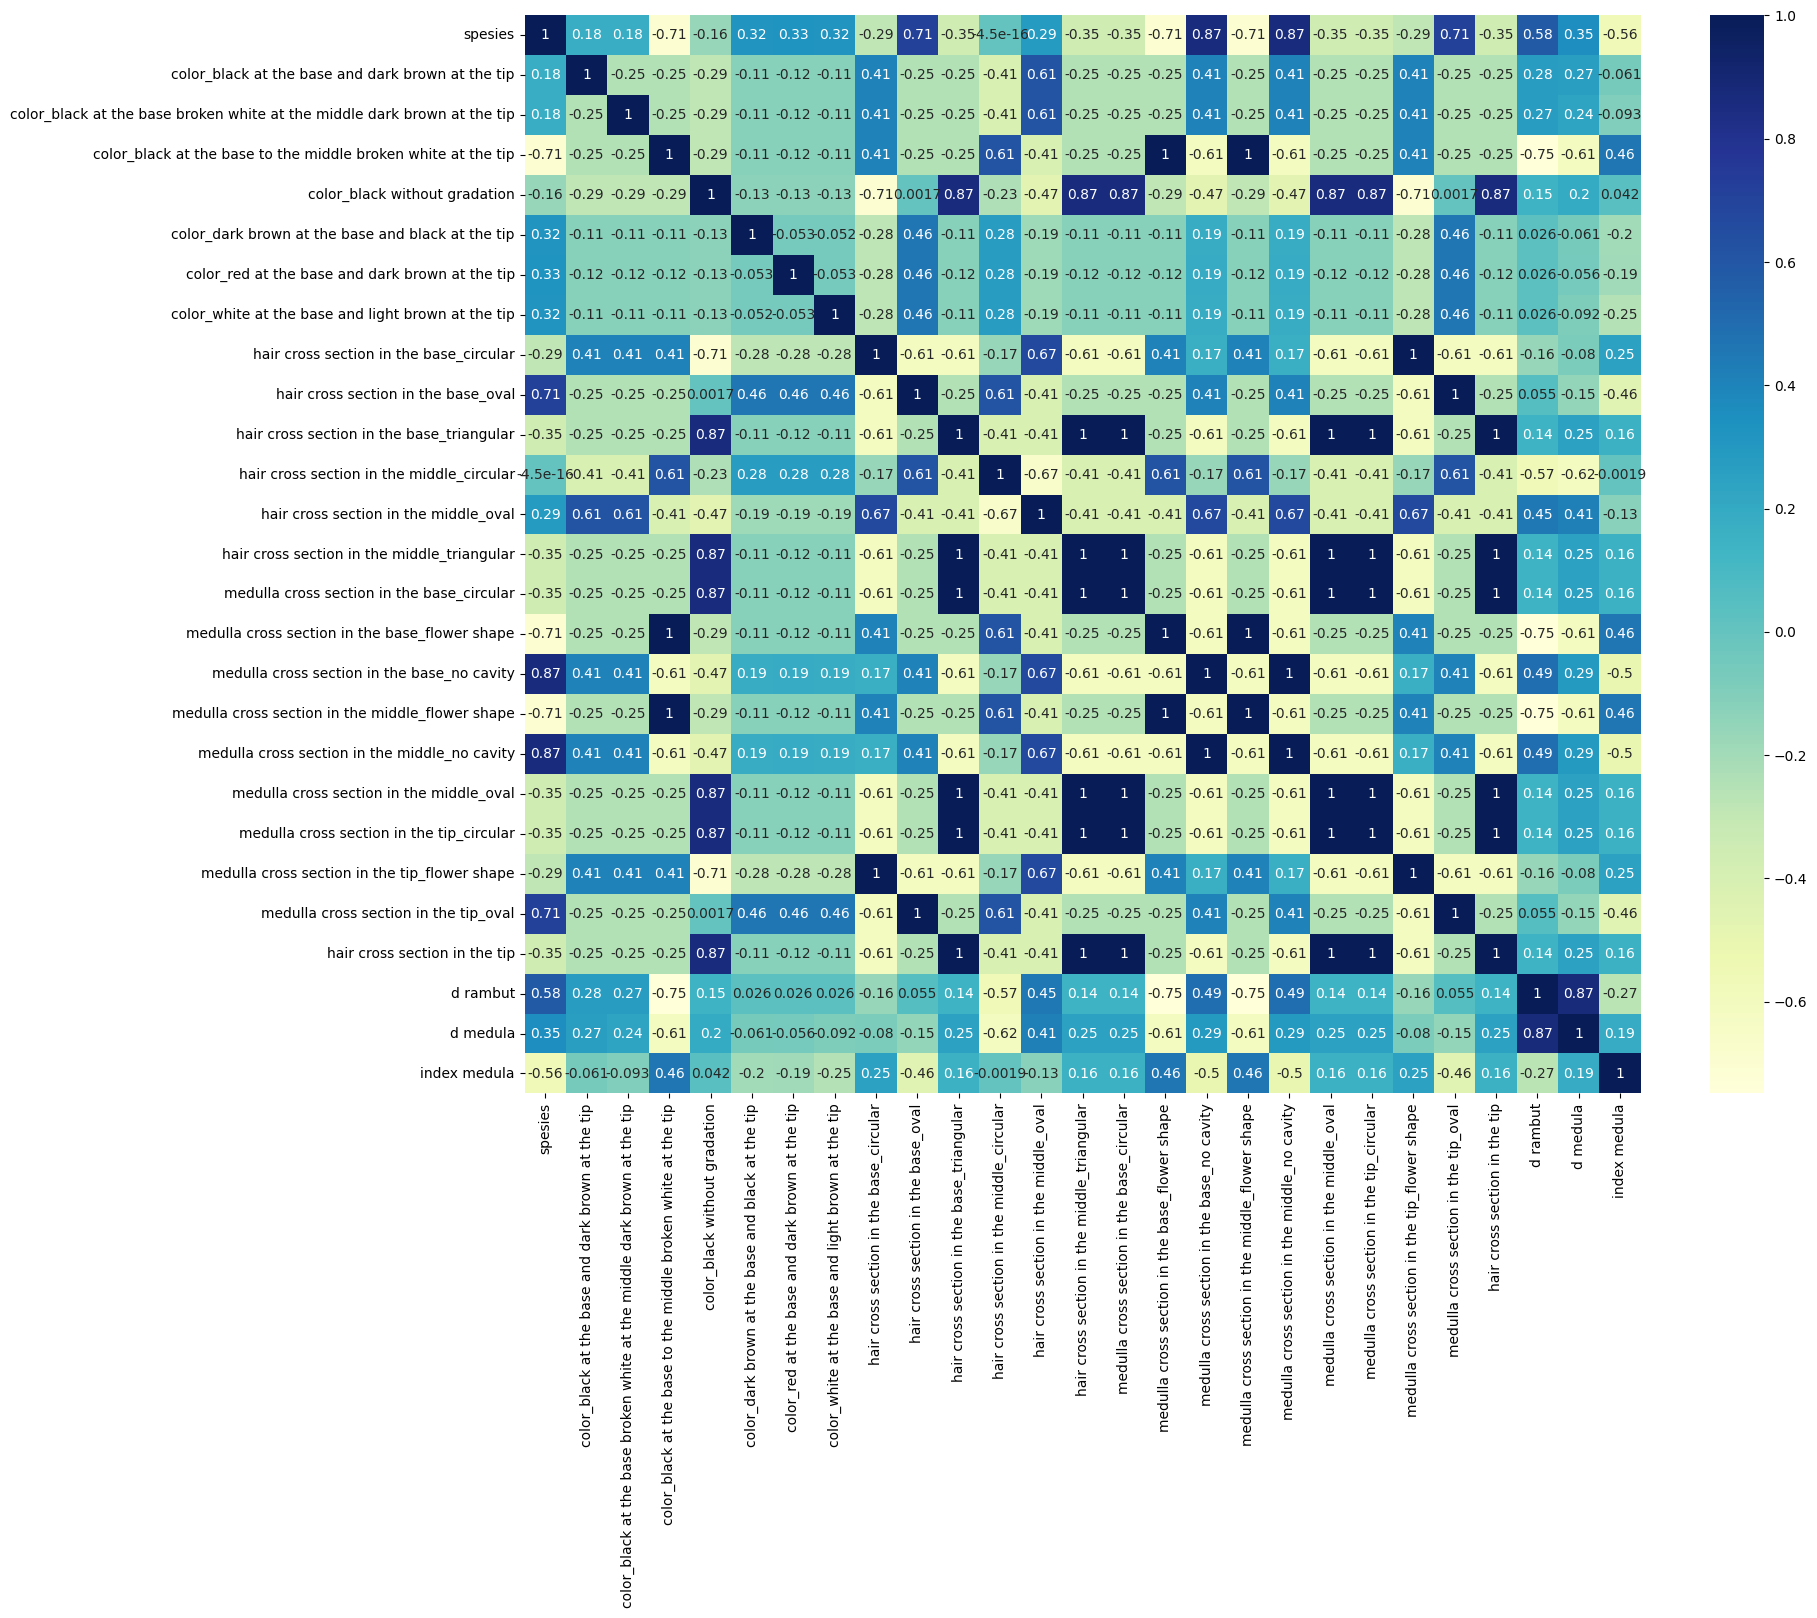

In [83]:
plt.figure(figsize=(18,14))
sns.heatmap(final_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
corr_matrix = final_df.corr().abs()  # Use absolute value to consider both positive and negative correlations

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index/column names of highly correlated columns (above the threshold)
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop the columns
df_reduced = final_df.drop(to_drop, axis=1)

print("Columns to drop:", to_drop)
print(df_reduced)

Columns to drop: ['hair cross section in the base_triangular', 'hair cross section in the middle_triangular', 'medulla cross section in the base_circular', 'medulla cross section in the base_flower shape', 'medulla cross section in the base_no cavity', 'medulla cross section in the middle_flower shape', 'medulla cross section in the middle_no cavity', 'medulla cross section in the middle_oval', 'medulla cross section in the tip_circular', 'medulla cross section in the tip_flower shape', 'medulla cross section in the tip_oval', 'hair cross section in the tip', 'd medula']


In [86]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   spesies                                                                   1350 non-null   int64  
 1   color_black at the base and dark brown at the tip                         1350 non-null   float64
 2   color_black at the base broken white at the middle dark brown at the tip  1350 non-null   float64
 3   color_black at the base to the middle broken white at the tip             1350 non-null   float64
 4   color_black without gradation                                             1350 non-null   float64
 5   color_dark brown at the base and black at the tip                         1350 non-null   float64
 6   color_red at the base and dark brown at the tip                 

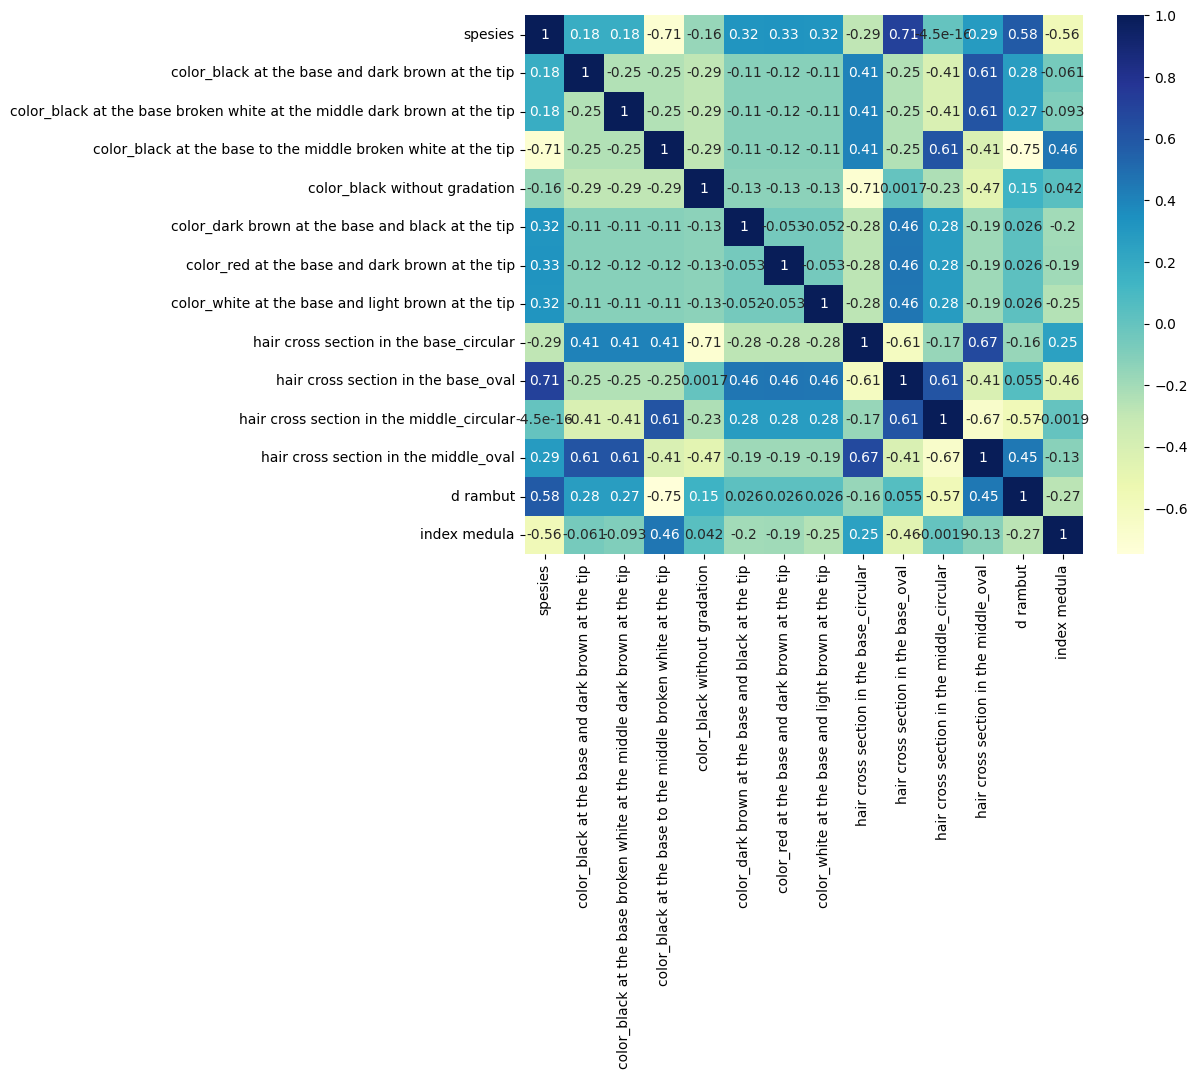

In [88]:
plt.figure(figsize=(9,7))
sns.heatmap(df_reduced.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Modelling

In [37]:
# split data for tree C5.0
y_tree = tree_df['spesies']
X_tree = tree_df.drop(['spesies', 'd rambut'], axis=1)

In [ ]:
X_tree

In [39]:
train_x, test_x, train_y, test_y = train_test_split(X_tree, y_tree, test_size=0.2, stratify=y_tree)

In [ ]:
# split data into 11 folds
skf = StratifiedKFold(n_splits=11)

### C5.0

In [ ]:
model = C45Classifier()
# using folds
for train_index, test_index in skf.split(X_tree, y_tree):
  model.fit(X_tree.iloc[train_index], y_tree.iloc[train_index])
  model.evaluate(X_tree.iloc[test_index], y_tree[test_index])


In [40]:
model = C45Classifier()
model.fit(train_x, train_y)
model.evaluate(test_x, test_y)

Evaluation result: 
Total accuracy:  0.9333333333333333
Accuracy  S. barbatus :  1.0
Accuracy  S. celebensis :  1.0
Accuracy  S. verrucossus :  1.0
Accuracy  S. scofa :  0.8888888888888888
Accuracy  S. scrofa :  0.7777777777777778


In [41]:
model.generate_tree_diagram(graphviz, 'tree_C5')

'tree_C5.png'

In [42]:
model.summary()

Decision Tree Classifier Summary
Number of Instances   :  1080
Number of Attributes  :  9
Number of Leaves      :  29
Number of Rules       :  29
Tree Depth            :  3


### CART

In [87]:
# split data for tree C5.0
y_cart = num_df['spesies']
X_cart = num_df.drop(['spesies'], axis=1)

train_x, test_x, train_y, test_y = train_test_split(X_cart, y_cart, test_size=0.2, stratify=y_cart)

In [48]:
cart = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
cart = cart.fit(train_x, train_y)

In [49]:
y_pred = cart.predict(test_x)
acc = accuracy_score(y_pred, test_y)
print(acc)

0.9555555555555556


In [ ]:
tree.plot_tree(cart)

### KNN

In [101]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
acc = accuracy_score(y_pred, test_y)
print(acc)

0.9629629629629629


## Down here is a trial mode for KNN





In [102]:
# sample data to predict
xx = test_x.iloc[10].values.reshape(1,-1)
yy = test_y.iloc[10]
# print(type(xx))
xx

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  2.        ,
         1.        ,  1.        ,  1.1372174 ,  0.95390671, -0.19800493]])

In [103]:
y_pred = knn.predict(xx)
distances, indices = knn.kneighbors(xx)

print("Indices of neighbors:", indices)
print("Distances to neighbors:", distances)

Indices of neighbors: [[ 608  134  731  900  445  349 1059  597  198  337   54]]
Distances to neighbors: [[0.23180915 0.27837644 0.33499777 0.36171244 0.36952025 0.38615016
  0.4117925  0.42993666 0.46205717 0.46934203 0.49558167]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [1]:
print(df['spesies'].iloc[indices[0]].value_counts())

NameError: name 'df' is not defined

In [96]:
num_df.iloc[[608, 134, 731, 900, 445]]

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
608,3,1,0,1,0,2,1,1,1.113297,0.423255,-0.874816
134,0,2,0,0,0,1,0,1,-1.517120,-1.181730,1.511883
731,3,0,0,1,0,2,1,1,1.493075,1.840916,0.485400
900,4,6,1,0,0,2,1,2,0.201133,-0.603843,-1.638751
445,1,3,2,2,1,0,2,0,0.125730,0.299789,0.231358


In [97]:
test_x.iloc[10]

color                                  0.000000
hair cross section in the base         0.000000
hair cross section in the middle       1.000000
hair cross section in the tip          0.000000
medulla cross section in the base      2.000000
medulla cross section in the middle    1.000000
medulla cross section in the tip       1.000000
d rambut                               1.137217
d medula                               0.953907
index medula                          -0.198005
Name: 671, dtype: float64

In [98]:
df['spesies'].iloc[[608, 134, 731, 900, 445]]

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
608,S. scrofa,black at the base broken white at the middle d...,circular,oval,circular,no cavity,no cavity,flower shape,1.113297,0.423255,-0.874816
134,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.517120,-1.181730,1.511883
731,S. scrofa,black at the base and dark brown at the tip,circular,oval,circular,no cavity,no cavity,flower shape,1.493075,1.840916,0.485400
900,S. verrucossus,white at the base and light brown at the tip,oval,circular,circular,no cavity,no cavity,oval,0.201133,-0.603843,-1.638751
445,S. celebensis,black without gradation,triangular,triangular,triangular,circular,oval,circular,0.125730,0.299789,0.231358


In [100]:
print(y_pred)
print(yy)

[3]
3


## Down here is trial using one hot encoding and reduced col with correlation above 0.8

### CART Trial

In [89]:
y = df_reduced['spesies']
X = df_reduced.drop(['spesies'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y)

In [91]:
tree_clf = tree.DecisionTreeClassifier(criterion='entropy')
tree_clf = tree_clf.fit(train_x, train_y)
predicted = tree_clf.predict(test_x)
acc = accuracy_score(predicted, test_y)
print(acc)

0.9333333333333333


In [ ]:
tree.plot_tree(tree_clf)

## C5 trial

In [94]:
model = C45Classifier()
model.fit(train_x, train_y)
model.evaluate(test_x, test_y)

Evaluation result: 
Total accuracy:  0.8296296296296296
Accuracy  3 :  1.0
Accuracy  0 :  1.0
Accuracy  2 :  0.14814814814814814
Accuracy  1 :  1.0
Accuracy  4 :  1.0


Note :
use label encoder saja, tetap pakai selected feature dari correlation-nya.
untuk C5 tinggal tambah kolom category untuk yang integer.
gunakan df.copy() untuk data latih C5 dan validasi KNN (invert transform)

siapkan df baru untuk KNN yang telah di label-encoder